# Operaciones morfológicas

Las oeraciones morfológicas estan relacionadas a la forma del contenido de una imagen. Usualmente se realizan sobre imágenes binarias. Para aplicar una operación morfológica se necesita una imagen y un kernel que define la naturaleza de la operación. Las dos operaciones morfológicas básicas son la **Erosión** y la **Dilatación**.


## Binarización
Antes de poder aplicar una operación morfológica es necesario *binarizar* la imagen que se desea procesar. Este proceso consiste en definir uno o varios umbrales para cada pixel en la imagen. Si el pixel se encuentra entre los rangos definidos por el umbral o los umbrales se asigna un valor maximo y si está fuera, se asigna un 0. 

Es necesario que la imagen a binarizar sea una imagen **en escala de grises** pues se toma en cuenta el valor de la intensidad del pixel para realizar el proceso de binarización.

OpenCV provee diferentes tipos de binarización a través de la función `threshold()`.


In [36]:
def display_gray(img, title="gray"):
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.xticks([])
    plt.yticks([])

def display_gray2(img1, img2):
    plt.subplot(121)
    plt.imshow(img1, cmap="gray")
    plt.title("Original")
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.imshow(img2, cmap="gray")
    plt.title("procesada")
    plt.xticks([])
    plt.yticks([])

def display_gray_row(*imgs):
    for i, img in enumerate(imgs):
        plt.subplot(1, len(imgs), i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(f"{i}")
        plt.xticks([])
        plt.yticks([])



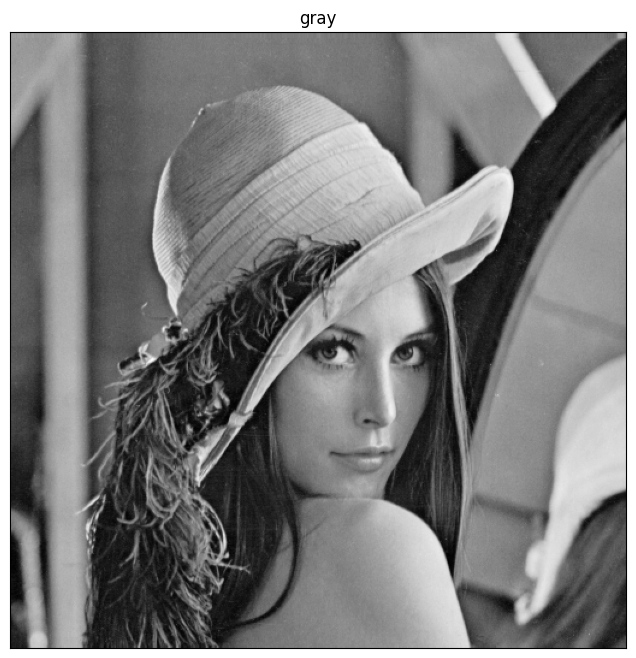

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]    # incrementar tamaño de plots

img = cv2.imread("lenna.png")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

display_gray(gray)

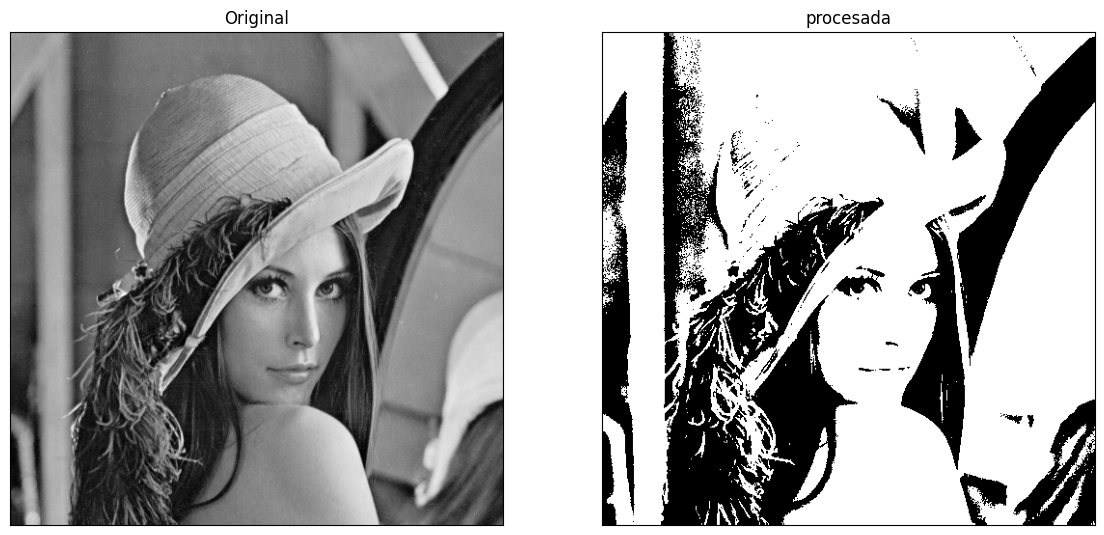

In [38]:
ret, thres = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

display_gray2(gray, thres)

In [39]:
print(thres.shape)
print(thres[200, 0])


(512, 512)
255


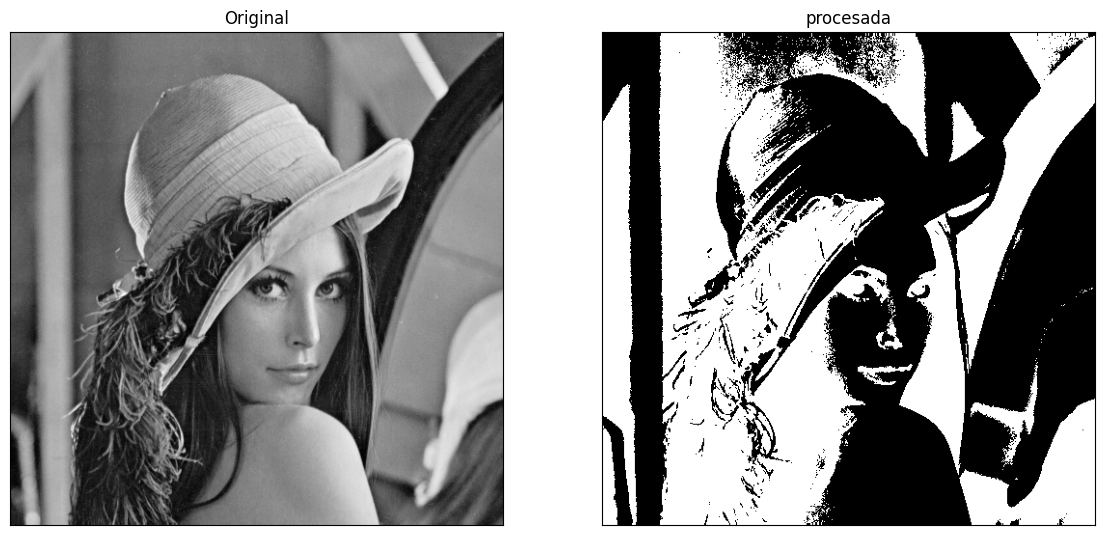

In [40]:
ret, thres = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

display_gray2(gray, thres)

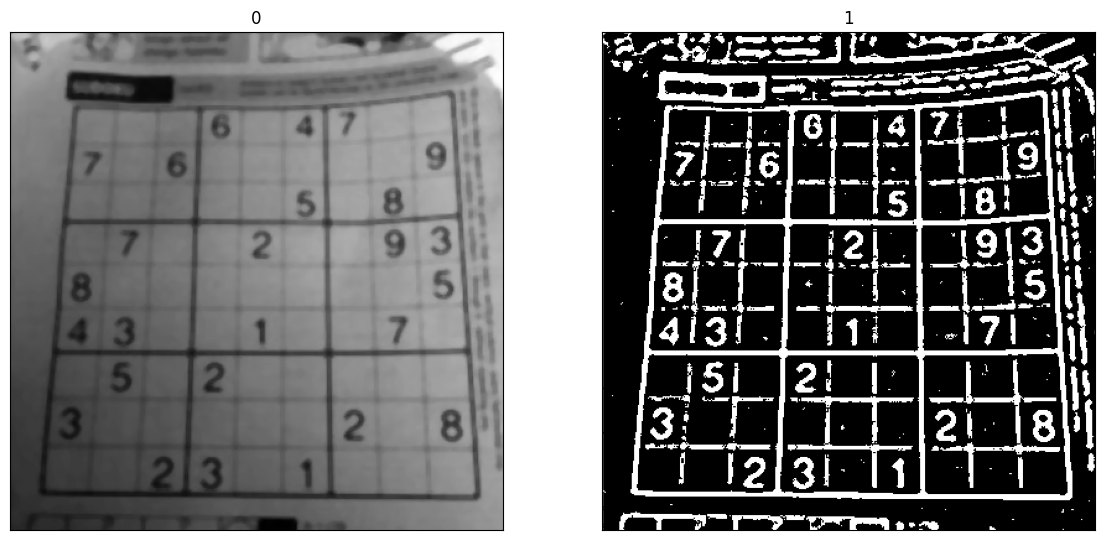

In [41]:
sudoku = cv2.cvtColor(cv2.imread("sudoku.png"), cv2.COLOR_BGR2GRAY)
sudoku = cv2.medianBlur(sudoku, 5)

# binarizacion global
ret, th1 = cv2.threshold(sudoku, 127, 255, cv2.THRESH_BINARY)

# binarizacion adaptativa usando el valor medio
th2 = cv2.adaptiveThreshold(sudoku, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# binarizacion adaptativa usando una suma gaussiana
th3 = cv2.adaptiveThreshold(sudoku, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

display_gray_row(sudoku, th3)

## Erosión
La idea de la operación de erosión es similar a la erosión del suelo: se eliminan los pixeles cercanos al borde de un contorno, luego de la operación, los contornos blancos se hacen más delgados o directamente desaparecen si son demasiado delgados o pequeños.

La erosión es útil para remover ruido en forma de pixeles blancos, también para desconectar contornos en una imagen binarizada previamente.


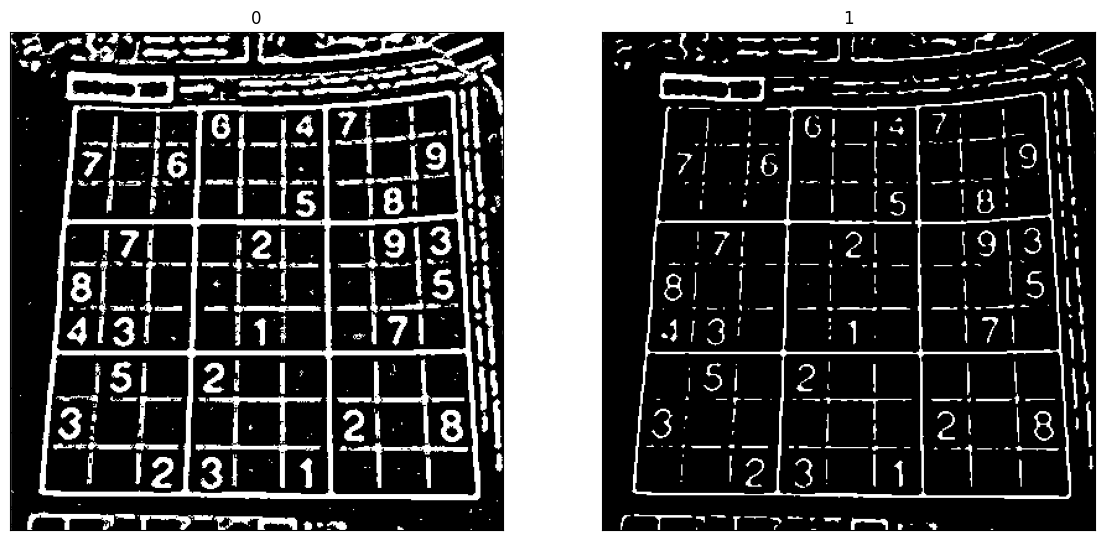

In [42]:
kernel = np.ones((3, 3), np.uint8)

sudoku_bin = cv2.adaptiveThreshold(sudoku, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

erosion = cv2.erode(sudoku_bin, kernel, iterations=1)

display_gray_row(sudoku_bin, erosion)

## Dilatación

La dilatación es la operación opuesta a la erosión. En este caso se incrementan los pixeles que tengan vecinos cercanos iguales a 1. Esto hace que la región blanca se incremente. Usualmente la dilatación se aplica luego de una erosión, debido a que la erosión disminuye el grosor del objeto y elimina el ruido, la dilatación vuelve a resaltar los objetos principales.

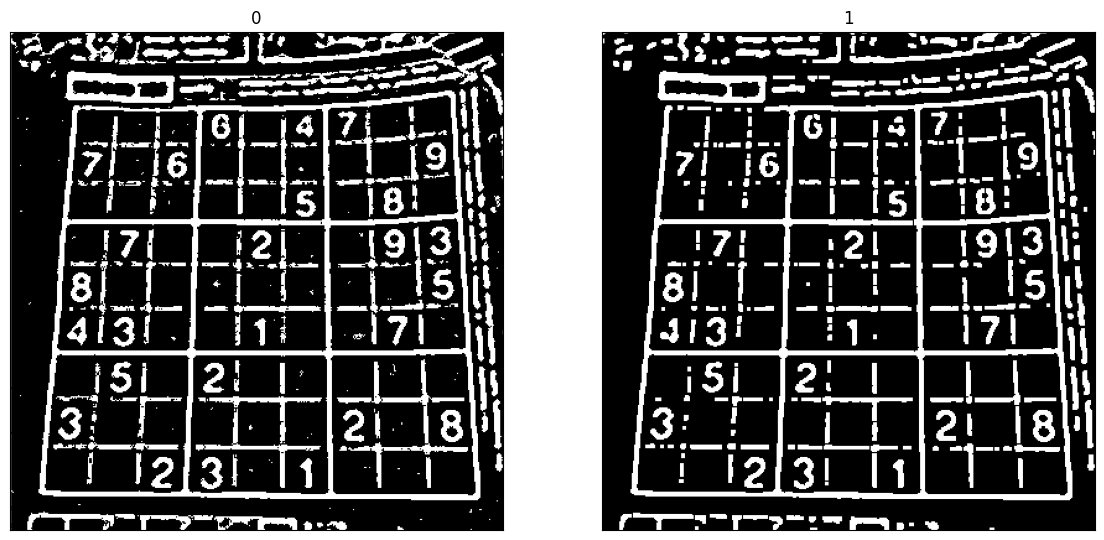

In [43]:
kernel = np.ones((3, 3), np.uint8)

dilation = cv2.dilate(erosion, kernel, iterations=1)

display_gray_row(sudoku_bin, dilation)

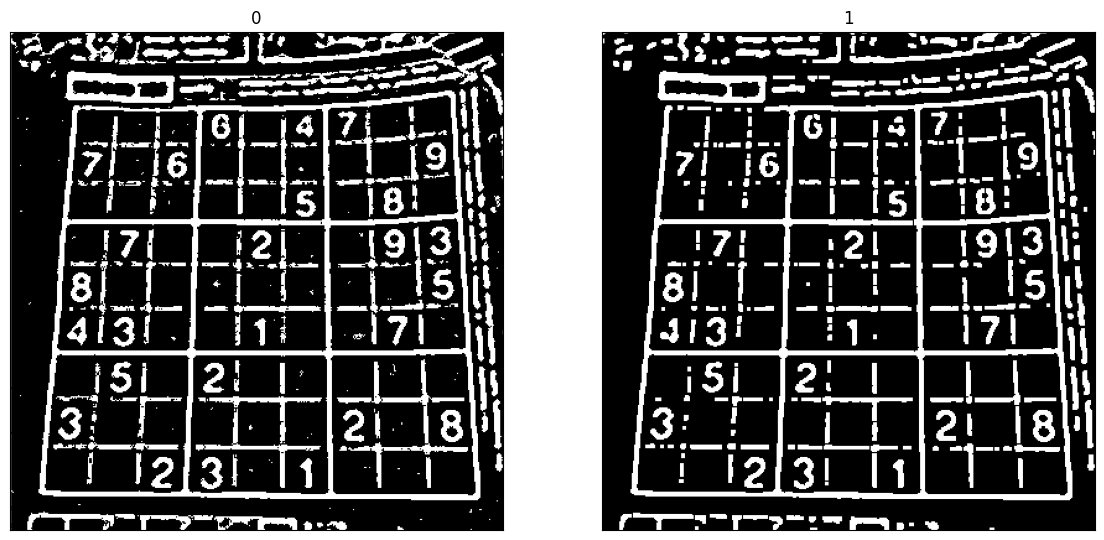

In [44]:
# opening = erosion => dilation
opening = cv2.morphologyEx(sudoku_bin, cv2.MORPH_OPEN, kernel)
display_gray_row(sudoku_bin, opening)

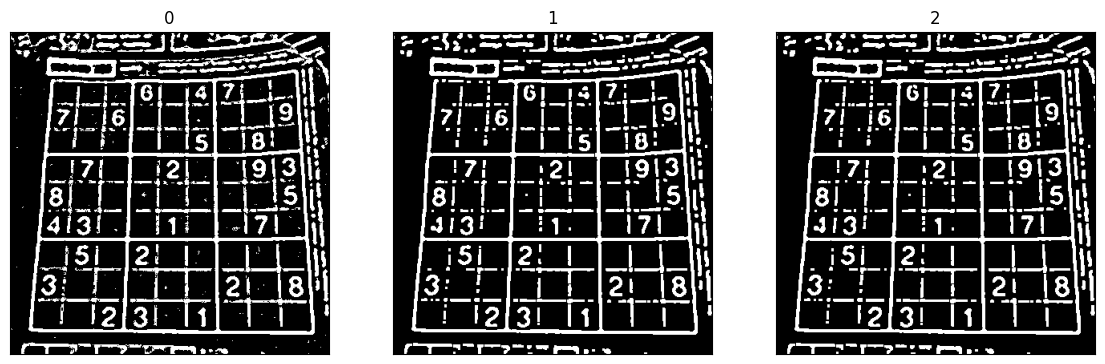

In [45]:
kernel = np.ones((3, 3), np.uint8)

sudoku_bin = cv2.adaptiveThreshold(sudoku, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# OPEN
erosion = cv2.erode(sudoku_bin, kernel, iterations=1)
dilation = cv2.dilate(erosion, kernel, iterations=1)

opening = cv2.morphologyEx(sudoku_bin, cv2.MORPH_OPEN, kernel)

display_gray_row(sudoku_bin, dilation, opening)

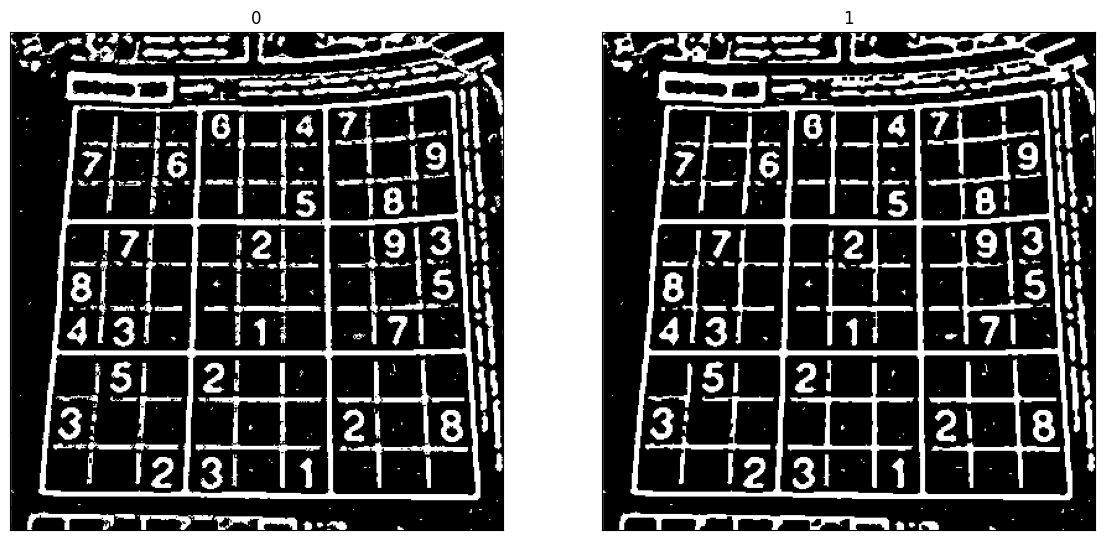

In [46]:
# closing = dilation => erosion
closing = cv2.morphologyEx(sudoku_bin, cv2.MORPH_CLOSE, kernel)
display_gray_row(sudoku_bin, closing)

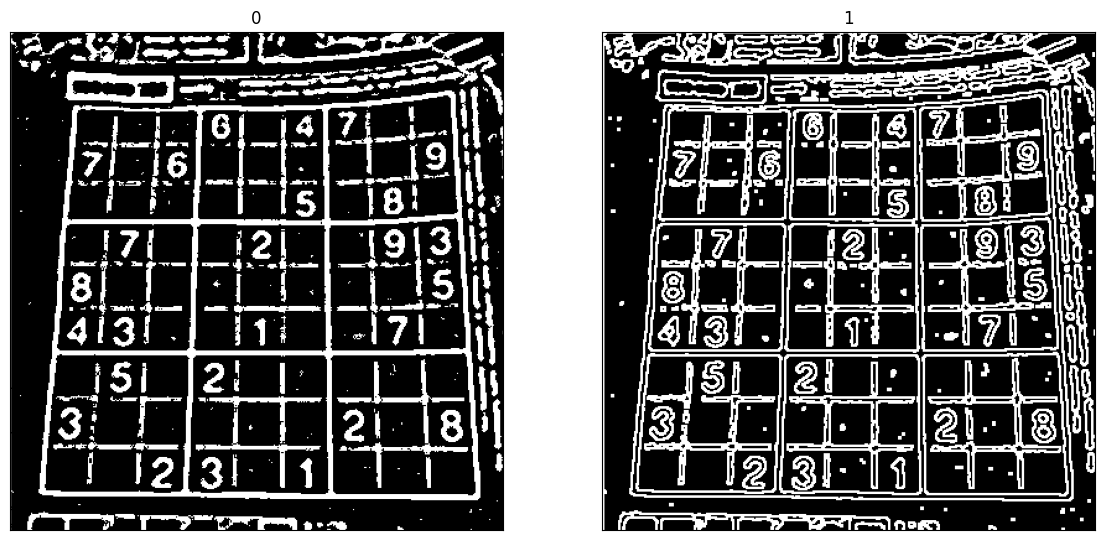

In [47]:
# gradiente morfologico = dilation - erosion
gradient = cv2.morphologyEx(sudoku_bin, cv2.MORPH_GRADIENT, kernel)
display_gray_row(sudoku_bin, gradient)

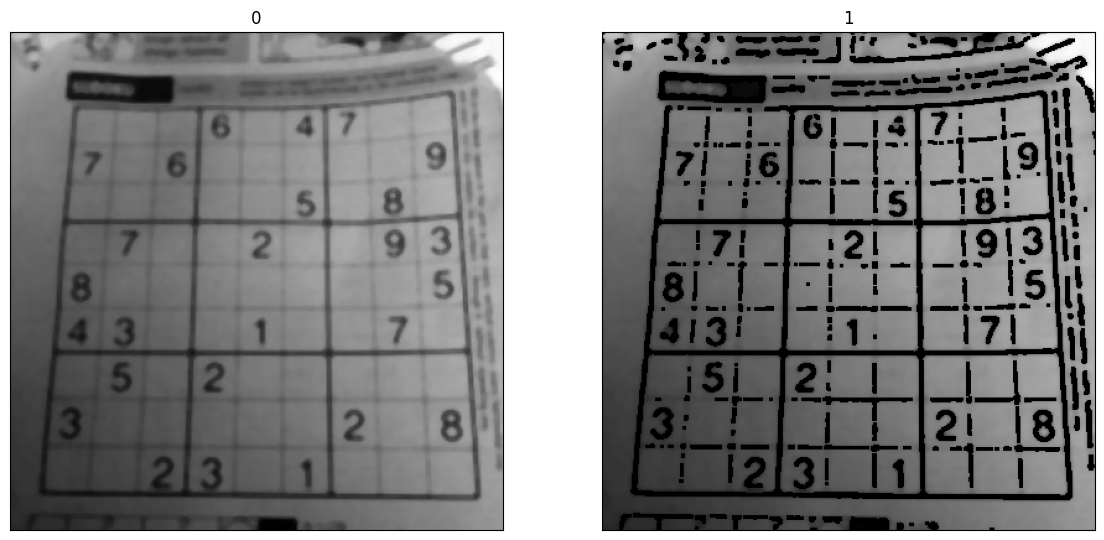

In [48]:
numbers_mask = cv2.morphologyEx(sudoku_bin, cv2.MORPH_OPEN, kernel)
numbers_mask = cv2.bitwise_not(numbers_mask)
sudoku2 = cv2.bitwise_and(sudoku, sudoku, mask=numbers_mask)
display_gray_row(sudoku, sudoku2)